# animelytics! >///<
    CIS 545 | Carol Li | 10501401

### project structure, information
#### structure
1. **exploratory data analysis:** statistics, average, genre, ratings.
2. **feature selection and engineering**
    * drop unecessary columns with unecessary features
3. **modelling**
    * baseline model: linear regression.
    * comparison model: NN (?) decide when get here lol

#### links
https://www.kaggle.com/azathoth42/myanimelist

**using:**
* `anime_cleaned.csv`
* `animelist_cleaned.csv`

submission requires presentation, blog post, or session with craig.

## **0.** Loading Packages and Data

In [6]:
# installing required packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

# baseline regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from matplotlib import rcParams

# graph display
import joblib
import pydot
from IPython.display import Image

In [12]:
# loading animelist data
animelist_data = './data/animelists_cleaned.csv'
animelist_df = pd.read_csv(animelist_data)
animelist_df

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:33:03,NaN
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:32:05,NaN
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0.0,0,2010-03-29 04:24:12,NaN
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN


In [8]:
# loading anime rating data
anime_data = './data/anime_cleaned.csv'
anime_df = pd.read_csv(anime_data)

**notes on columns:**
* rating refers to maturity rating
* scored by refers to number of ratings for data

In [10]:
# all columns of anime_df
anime_df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year'],
      dtype='object')

In [51]:
# all genres of values in anime_df
for genre in anime_df['genre']:
    print('***')
    print(genre)
    
# TODO: want to split by each individual value and put into separate columns - is this possible? -> look at tds link

***
Comedy, Supernatural, Romance, Shounen
***
Comedy, Parody, Romance, School, Shounen
***
Comedy, Magic, School, Shoujo
***
Comedy, Drama, Magic, Romance, Fantasy
***
Comedy, Drama, Romance, Shounen
***
Kids, School, Shoujo
***
Magic, Comedy, Romance, School, Shoujo
***
Action, Drama, Fantasy, Romance, School, Supernatural
***
Music, Slice of Life, Comedy, Romance, Josei
***
Comedy, Harem, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Comedy, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Slice of Life, Comedy, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Supernatural, Shounen
***
Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen
***
Slice of Life, Drama, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Martial Arts, Shounen
***
Slice of Life, Comedy, Martial Arts, Fantasy
***
Slice of Life, Comedy, Romance, School
***
Comedy, Drama, Romance, Shounen
***
Comedy, School, Shoujo, Super Power
***
Comedy, Dram

Slice of Life, Comedy, Romance, School
***
Slice of Life, Supernatural
***
Harem, Music, Comedy, Romance, Shoujo
***
Mystery, Drama, Romance
***
Comedy, Ecchi, Harem, Romance, Shounen
***
Action, Adventure, Mystery, Comedy, Seinen
***
Comedy, Harem, Hentai
***
Adventure, Comedy, Drama, Fantasy
***
Action, Sci-Fi, Comedy
***
Ecchi, Parody, Romance, Seinen
***
Action, Samurai, Historical, Drama, Shounen
***
Comedy, Kids, Super Power
***
Fantasy, Magic, Slice of Life
***
Adventure, Mecha, Sci-Fi, Shoujo
***
Sci-Fi, Fantasy
***
Action, Comedy, Ecchi, Sci-Fi
***
Harem, Music, Ecchi, Fantasy, Seinen
***
Fantasy, Supernatural, Comedy, Parody, Shounen
***
Action, Drama, Mecha, Military, Sci-Fi
***
Comedy, Parody, School
***
Slice of Life, Comedy, Sports
***
Action, Adventure, Romance, Martial Arts, Fantasy
***
Comedy
***
Romance, School
***
Action, Adventure, Comedy, Kids, Fantasy
***
Fantasy
***
Action, Mecha, Military, Sci-Fi
***
Action, Military, Supernatural, Drama, Vampire, Shounen
***
Co

Space, Mecha, Military, Sci-Fi, Shounen
***
Action, Adventure, Mystery, Comedy, Seinen
***
Slice of Life, Comedy, School
***
Adventure, Comedy, Historical, Romance, Sci-Fi
***
Game, Slice of Life, Comedy
***
Game, Comedy
***
Comedy, Kids
***
Kids
***
Adventure, Comedy, Drama, Kids, Sci-Fi
***
Action, Adventure, Magic, Fantasy
***
Action, Ecchi, Comedy, Sci-Fi
***
Action, Mystery, Supernatural
***
Adventure, Historical, Drama
***
Horror, Mystery, Supernatural, Vampire
***
Adventure, Fantasy, Kids, Slice of Life
***
Action, Adventure, Comedy, Kids, Mecha, Sci-Fi, Shounen, Super Power
***
Action, Adventure, Ecchi, Fantasy
***
Comedy, Romance, Yaoi
***
Comedy
***
Action, Adventure, Slice of Life, Super Power
***
Slice of Life, Comedy, Ecchi
***
Comedy
***
Hentai
***
Dementia, Horror, Supernatural
***
Action, Military, Sci-Fi, Slice of Life, School
***
Action, Adventure, Supernatural, Shounen
***
Action, Sci-Fi, Comedy, Historical, Parody, Samurai, Mecha, Shounen
***
Drama, Romance, Slice o

***
Super Power, Drama, School
***
Music, Comedy
***
Music
***
Action, Sci-Fi, Mecha
***
Slice of Life, Comedy, School, Seinen
***
Comedy, School, Shounen, Sports
***
Comedy, Drama, Ecchi, School
***
Adventure, Fantasy
***
Sci-Fi, Adventure, Mystery, Dementia, Police, Psychological, Thriller, Mecha
***
Action, Adventure, Fantasy, Romance, Sci-Fi
***
Action, Ecchi, Comedy
***
Action, Adventure, Magic, Fantasy
***
Action, Game, Shounen
***
Drama, Romance, Slice of Life
***
Comedy, Romance, Sci-Fi
***
Slice of Life, Comedy, School
***
Action, Comedy, Drama, Josei, Supernatural, Vampire
***
Adventure, Comedy, Ecchi, Fantasy, Historical
***
Action, Mecha, Super Power, Sci-Fi
***
Comedy, Magic
***
Demons, Magic, Romance, Shoujo
***
Fantasy, Kids, Psychological, Slice of Life
***
Military, Sci-Fi, Space, Drama, Mecha
***
Comedy, Magic
***
Slice of Life, Seinen
***
Adventure, Drama, Sci-Fi, Slice of Life
***
Dementia, Drama, Historical, Psychological
***
Comedy, Historical, Romance, Supernatur

***
Music, Comedy
***
Slice of Life
***
Demons, Supernatural
***
Action, Supernatural, Fantasy
***
Comedy, Drama, Romance
***
Romance, Supernatural, Comedy, Historical, Drama
***
Comedy, Harem, Romance, School
***
Kids, Slice of Life, Comedy, Historical, School, Shoujo
***
Comedy, Romance, Sci-Fi
***
Action, Drama, Sci-Fi, Space
***
Action, Comedy, Supernatural, Romance, School
***
Action, Adventure, Fantasy, Military
***
Action, Drama, Mecha, Sci-Fi, Shounen
***
Action, Adventure, Fantasy, Game, Magic
***
Hentai
***
Action, Fantasy
***
Slice of Life, Comedy, Kids
***
Comedy, Horror
***
Action, Martial Arts, School
***
Action, Comedy, Mystery, Shounen
***
Music, Slice of Life, School, Shoujo
***
Slice of Life, Comedy, School
***
Action, Comedy, Drama, Ecchi, Fantasy, Horror, Magic, Shounen
***
Mystery, Psychological, Supernatural
***
Adventure, Fantasy, Kids
***
Action, Sci-Fi, Super Power
***
Military, Sci-Fi, Space, Drama, Romance, Mecha
***
Action, Adventure, Comedy, Demons, Fantasy

Action, Adventure, Fantasy
***
Ecchi
***
Slice of Life, Comedy, Parody
***
Action, Adventure, Psychological, Sci-Fi
***
Action, Military, Fantasy, Mecha, Shounen
***
Action, Military, Sci-Fi, Super Power, Mecha, School
***
Comedy, School, Shounen, Sports
***
Comedy, Sports, Drama, Romance, School, Shounen
***
Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power
***
Sci-Fi, Comedy, Shounen
***
Comedy, Magic, Romance, Seinen, Supernatural
***
Ecchi, Comedy, Harem, Romance, Demons, School
***
Action, Sci-Fi, Adventure, Police, Mecha
***
Action, Mystery, Horror, Supernatural, Seinen
***
Hentai
***
Comedy, Historical
***
Mystery, Police, Psychological, Supernatural, Thriller, Shounen
***
Action, Adventure, Sci-Fi, Shounen, Super Power
***
Action, Adventure, Fantasy, Game
***
Action, Mecha, Military
***
Adventure, Seinen
***
Adventure, Comedy, Drama, Fantasy, Kids
***
Mecha, Romance, Sci-Fi
***
Music, Magic, Romance, School
***
Slice of Life, Comedy, Drama, Romance, Shoujo


Action, Military, Super Power, Mecha, School
***
Magic, Shoujo
***
Comedy
***
Drama, Romance, School
***
Action, Supernatural, Vampire, Seinen
***
Slice of Life, Romance
***
Comedy, Mecha, Police, Sci-Fi
***
Music, Slice of Life, Shoujo
***
Demons, Historical, Military, Romance, Seinen, Supernatural
***
Action, Sci-Fi, Adventure, Space, Comedy
***
Comedy, School, Shounen, Supernatural
***
Comedy, Romance
***
Mystery, Comedy, Horror, Psychological, Drama
***
Mystery, Comedy
***
Action, Ecchi, Martial Arts
***
Slice of Life, Comedy, Josei
***
Action, Adventure, Comedy, Drama, Fantasy, Shounen, Super Power
***
Comedy, Seinen, Slice of Life
***
Harem, Hentai
***
Action, Comedy, Mecha, Parody, Sci-Fi, Shounen
***
Comedy, Dementia, Slice of Life
***
Fantasy, Kids, Magic, Romance, Shoujo, Super Power
***
Action, Adventure, Fantasy, Romance, Supernatural, Drama, Mystery, Shounen
***
Ecchi, School, Shounen
***
Action, Mystery, Supernatural
***
Hentai
***
Comedy, Fantasy, Kids
***
Comedy, Drama,

***
Comedy, Mecha, Parody
***
Hentai
***
Slice of Life, Psychological, Drama, Romance, Seinen
***
Music
***
Music
***
Action, Adventure, Fantasy, Magic, Shounen
***
Action, Sci-Fi, Super Power, Drama, Romance
***
Comedy, Slice of Life
***
Action, Adventure, Sci-Fi, Shounen, Super Power
***
Comedy, School, Slice of Life
***
Action, Drama, Romance, Sci-Fi
***
Drama, Romance, Slice of Life
***
Ecchi, Parody, Seinen
***
Action, Sci-Fi, Parody, Mecha
***
Romance, Shoujo
***
Action, Sci-Fi, Adventure, Mecha
***
Adventure
***
Comedy, Sports
***
Slice of Life, Historical, Drama, Romance, Seinen
***
Romance, School
***
Comedy, Parody, Sci-Fi
***
Slice of Life, Comedy
***
Comedy, Kids, Sci-Fi, Shounen
***
Comedy, Sci-Fi
***
Action, Mystery, Horror, Supernatural, Seinen
***
Action, Comedy, Fantasy, Shounen, Super Power, Supernatural, Vampire
***
Harem, Comedy, Romance, Ecchi, Vampire, Fantasy, School, Shounen
***
Adventure, Drama, Fantasy, Horror, Magic, Music, Sci-Fi, Supernatural
***
Mecha, Mil

***
Mystery, Comedy, Romance
***
Sci-Fi, Slice of Life, Comedy
***
Comedy, Parody, School
***
Action, Supernatural, Vampire
***
Adventure, Comedy, Drama, Sci-Fi, Shounen, Space
***
Comedy, School, Super Power
***
Adventure, Mystery, Comedy, Supernatural
***
Action, Adventure, Comedy, Drama
***
Adventure, Comedy, Mecha, Military, Sci-Fi
***
Action, Military, Sci-Fi, Adventure, Space, Drama, Romance, Mecha
***
Psychological, Drama, Fantasy, School, Seinen, Shoujo Ai
***
Action, Adventure, Fantasy, Kids
***
Slice of Life, Drama, Romance
***
Adventure, Comedy, Demons, Magic, Fantasy, Shounen
***
Action, Game, Adventure, Comedy, Parody
***
Action, Comedy, Fantasy
***
Drama, Mystery, Seinen, Supernatural
***
Magic, Shoujo
***
Action, Dementia, Drama, Horror, Martial Arts, Psychological, Seinen
***
Fantasy, Game, Magic, Music
***
Slice of Life, Comedy, Parody
***
Action, Adventure, Comedy, Fantasy, Shounen
***
Comedy, Historical
***
Action, Super Power, Military, Supernatural, Horror, Vampire

In [52]:
# all studios of values in anime_df -> easy grouping
for studio in anime_df['studio']:
    print('***')
    print(studio)

***
David Production
***
Gonzo
***
Satelight
***
Hal Film Maker
***
J.C.Staff
***
Studio Pierrot, Studio Hibari
***
Production Reed
***
J.C.Staff
***
J.C.Staff
***
Bones
***
Studio Deen
***
J.C.Staff
***
Studio Deen
***
Brain&#039;s Base
***
Studio Pierrot
***
Madhouse
***
Production I.G
***
Studio Pierrot
***
Studio Deen
***
J.C.Staff
***
J.C.Staff
***
Group TAC
***
Hal Film Maker
***
Madhouse
***
Studio Deen
***
Madhouse
***
TMS Entertainment
***
Pierrot Plus
***
Studio Pierrot
***
Tatsunoko Production
***
Hal Film Maker, TYO Animations
***
Shin-Ei Animation
***
Studio Deen
***
Madhouse
***
Toei Animation
***
Tokyo Movie Shinsha
***
Toei Animation
***
Madhouse
***
Sunrise
***
Zexcs
***
J.C.Staff
***
J.C.Staff
***
Sunrise
***
J.C.Staff
***
J.C.Staff
***
TMS Entertainment
***
Madhouse
***
J.C.Staff
***
Production I.G
***
Studio Deen
***
Studio Deen
***
Studio Deen
***
Yumeta Company
***
TMS Entertainment
***
Lerche
***
Studio Pierrot
***
Production I.G, Zexcs
***
Kachidoki Studio
***
G

Madhouse
***
Sunrise
***
Gathering
***
Studio Ghibli
***
J.C.Staff
***
Imagin
***
Studio Deen
***
Production I.G
***
Production I.G
***
Gonzo
***
Xebec
***
Gonzo
***
Studio Pierrot
***
Sunrise
***
Kachidoki Studio
***
Diomedea
***
Madhouse
***
Tezuka Productions
***
Madhouse
***
Shin-Ei Animation
***
Hoods Entertainment
***
AIC Plus+
***
MAPPA
***
Nippon Animation
***
OLM
***
Tatsunoko Production
***
Gainax
***
Studio Pierrot, Studio Gallop
***
Brain&#039;s Base
***
Manglobe
***
Studio Pierrot
***
Toei Animation
***
Daume
***
Diomedea
***
10Gauge
***
AIC Plus+
***
Seven Arcs Pictures
***
Seven Arcs Pictures
***
Marza Animation Planet
***
Manglobe
***
Sunrise
***
Toei Animation
***
Haoliners Animation League
***
Studio Hibari
***
Studio Gallop, Studio Deen
***
Zexcs
***
J.C.Staff
***
Sunrise
***
Ordet, LIDENFILMS
***
Studio Comet
***
Y.O.U.C
***
Silver Link.
***
Silver Link.
***
Bones
***
Studio Gallop
***
J.C.Staff
***
TMS Entertainment
***
MAPPA
***
AIC
***
Madhouse, Studio Deen, Magi

Sotsu
***
TYO Animations
***
Tezuka Productions
***
Bones
***
Zexcs
***
Bones
***
AIC
***
DLE
***
J.C.Staff
***
Steve N&#039; Steven, Rockwell Eyes
***
Satelight
***
Daume
***
Studio Pierrot
***
PoRO
***
AIC
***
Studio Pierrot
***
Brain&#039;s Base, Studio A-CAT
***
Nomad
***
Studio 1st
***
J.C.Staff
***
Madhouse
***
Silver Link.
***
Xebec
***
Arms
***
Mushi Production
***
Production I.G
***
Office Takeout
***
Seven Arcs Pictures
***
Nippon Animation
***
Sunrise
***
OLM
***
Studio Deen
***
KOO-KI
***
Zexcs
***
Tokyo Kids
***
Production I.G
***
Studio Pierrot
***
P.A. Works
***
Studio Deen
***
Sunrise
***
Production I.G
***
Shuka
***
Ordet, Encourage Films
***
DLE
***
Brain&#039;s Base
***
Nippon Animation
***
Ajia-Do
***
OLM
***
Jumondo
***
Oddjob
***
Studio Ghibli, Studio Hibari
***
Production Reed, Asahi Production
***
Sunrise
***
Trigger
***
Gainax
***
Vega Entertainment
***
Green Bunny
***
Gainax, feel.
***
Brain&#039;s Base
***
JCF
***
ufotable
***
Ordet, SANZIGEN
***
Orange
***
X

***
A-1 Pictures
***
Arms
***
Toei Animation
***
Bones
***
Zexcs
***
Kyoto Animation
***
Gainax
***
Fanworks, Imagineer
***
ILCA
***
Three-d
***
Gainax, Tatsunoko Production
***
Silver Link.
***
Studio Pierrot
***
Xebec
***
Bones
***
Studio Comet
***
Sunrise
***
Sunrise
***
Studio 9 MAiami
***
Nomad
***
AIC
***
A.C.G.T.
***
Doga Kobo
***
Kyoto Animation, Animation Do
***
Manglobe
***
CoMix Wave Films
***
Gonzo
***
Seven
***
PoRO
***
Production Reed
***
Production Reed
***
OLM
***
Ajia-Do
***
A-1 Pictures
***
J.C.Staff
***
Nippon Animation
***
Kyoto Animation
***
Zexcs
***
AIC
***
Kamikaze Douga
***
Satelight
***
Millepensee
***
Production I.G
***
Platinum Vision
***
Toei Animation
***
Kachidoki Studio
***
OLM
***
OLM
***
Studio Junio, Annapuru
***
Triangle Staff
***
Studio Pierrot
***
Production I.G, M.S.C
***
Studio Bogey
***
Nippon Animation
***
Sunrise
***
Studio Pierrot, Pierrot Plus
***
TMS Entertainment
***
Studio Pierrot
***
OLM
***
TMS Entertainment, Tokyo Kids, Minami Machi Bu

***
Shaft
***
Diomedea
***
SynergySP
***
Brain&#039;s Base
***
Studio Rikka
***
J.C.Staff
***
Tatsunoko Production
***
Production I.G
***
Tezuka Productions
***
Xebec
***
J.C.Staff
***
Suzuki Mirano
***
TYO Animations
***
J.C.Staff
***
A-1 Pictures
***
Toei Animation
***
J.C.Staff
***
GoHands
***
Tezuka Productions
***
Gonzo, AIC
***
Trans Arts
***
TMS Entertainment
***
ufotable
***
Brain&#039;s Base
***
Silver Link.
***
J.C.Staff
***
Diomedea
***
Xebec
***
Madhouse
***
Toei Animation
***
Studio Gallop
***
Production I.G
***
Tatsunoko Production
***
Sunrise
***
Flavors Soft
***
Asread
***
ufotable
***
Madhouse
***
Kinema Citrus
***
Gonzo, Satelight
***
Encourage Films
***
Toei Animation
***
Kyoto Animation
***
Bones, Production I.G, Studio 4°C, Toei Animation
***
Madhouse
***
Toei Animation
***
A-1 Pictures, Ordet
***
B&amp;T
***
Toei Animation
***
Gonzo
***
TMS Entertainment
***
Group TAC
***
Studio Deen
***
Toei Animation
***
A-1 Pictures
***
OLM
***
Actas
***
Toei Animation
***
Prod

Bones
***
Toei Animation
***
Hal Film Maker
***
Genco, Radix
***
DLE
***
Xebec
***
Toei Animation
***
Polygon Pictures
***
Kyoto Animation
***
Gainax
***
GoHands
***
Production I.G
***
TMS Entertainment
***
A.C.G.T.
***
Group TAC
***
AIC Build
***
Sunrise
***
Telecom Animation Film
***
feel.
***
Madhouse
***
Gainax
***
J.C.Staff
***
Sunrise
***
Studio Deen
***
Toei Animation
***
Studio Deen
***
OLM
***
Studio Deen
***
Seven
***
Wit Studio
***
Shaft
***
Madhouse
***
A-1 Pictures
***
J.C.Staff
***
Kinema Citrus, Orange
***
Brain&#039;s Base
***
Kyoto Animation
***
Calf Studio
***
Sunrise
***
Gainax
***
Kyoto Animation, Sunrise
***
TMS Entertainment, Jinnis Animation Studios
***
Pops Inc.
***
Ascension
***
Diomedea
***
Yumeta Company
***
Kinema Citrus
***
Gonzo
***
Shin-Ei Animation
***
Studio Fantasia
***
Madhouse
***
Science SARU
***
Studio Pierrot
***
Gonzo, Palm Studio
***
Lay-duce
***
Satelight
***
10Gauge
***
Telescreen BV
***
Haoliners Animation League
***
T-Rex
***
Gonzo
***
Studi

T-Rex
***
Tsuchida Productions
***
Phoenix Entertainment
***
EMT²
***
Studio Pierrot
***
Dynamo Pictures
***
Zexcs
***
J.C.Staff
***
Tomovies
***
J.C.Staff
***
TMS Entertainment
***
RG Animation Studios
***
L²Studio
***
Xebec
***
Silver Link.
***
Pierrot Plus
***
Toei Animation
***
Production I.G
***
Triangle Staff
***
Collaboration Works
***
Pastel
***
Chippai
***
Tokyo Kids
***
Shuka
***
Sunrise
***
Madhouse
***
Tatsunoko Production
***
Studio Sign
***
Toei Animation
***
Gathering
***
Kyotoma
***
Studio Pierrot
***
Fanworks
***
Tomoyasu Murata Company
***
Studio Gokumi
***
A-1 Pictures
***
ixtl, LIDENFILMS
***
OLM
***
Studio Ghibli
***
Graphinica
***
Studio 9 MAiami
***
Studio Deen
***
W-Toon Studio
***
Shaft
***
TMS Entertainment
***
Studio Deen
***
Toei Animation
***
Toei Animation
***
Kanaban Graphics
***
Office Takeout
***
Production I.G
***
Onionskin
***
Animate Film
***
Toei Animation
***
Studio Deen
***
Studio Colorido
***
Toei Animation
***
A-1 Pictures
***
Arms
***
Egg
***
J

***
AIC, Darts
***
Shaft
***
Studio 4°C
***
feel.
***
J.C.Staff
***
TMS Entertainment
***
Production I.G
***
Production I.G
***
Bones
***
J.C.Staff
***
L²Studio
***
Trigger
***
Trinet Entertainment
***
Yumeta Company
***
Kyoto Animation
***
Fanworks
***
Ajia-Do
***
Jinnis Animation Studios
***
Toei Animation
***
LIDENFILMS
***
feel.
***
Bee Media, 81 Produce
***
Satelight
***
Studio Pierrot
***
Doga Kobo
***
Production IMS
***
A.C.G.T.
***
Doga Kobo
***
Production Reed
***
Studio Pierrot
***
Manglobe
***
Xebec Zwei
***
Bee Train
***
Bones
***
Flavors Soft
***
Sunrise
***
Nippon Animation
***
Production I.G
***
J.C.Staff
***
Sunrise
***
Doga Kobo
***
ILCA
***
Eiken
***
Shanghai Animation Film Studio
***
OLM, OLM Digital, Sprite Animation Studios
***
DLE
***
Sunrise
***
Actas, Studio 3Hz
***
Hal Film Maker
***
Silver Link.
***
Eiken
***
Daume
***
Arms
***
Studio Comet
***
Nippon Animation
***
Studio Deen
***
Toei Animation
***
APPP
***
Madhouse
***
Studio Pierrot
***
J.C.Staff
***
Shimog

***
Production I.G, Xebec, OLM
***
BOOTLEG
***
Studio 4°C
***
Doga Kobo
***
Studio Pierrot
***
A-1 Pictures
***
Wit Studio
***
Sunrise
***
Arms
***
Studio Hibari
***
SANZIGEN, LIDENFILMS
***
Nippon Animation
***
Toei Animation
***
Team YokkyuFuman
***
Sunrise
***
Tatsunoko Production
***
Shaft
***
Production I.G
***
Studio Deen
***
Shaft
***
PoRO
***
Ordet
***
SANZIGEN, LIDENFILMS
***
ufotable
***
KIZAWA Studio
***
Mushi Production
***
Doga Kobo
***
Studio Deen
***
Seven Arcs Pictures
***
Sparkly Key Animation Studio
***
AIC
***
Sunrise
***
Kyoto Animation
***
Shin-Ei Animation
***
A-1 Pictures
***
Shaft
***
Tatsunoko Production
***
Group TAC
***
Toei Animation
***
Satelight, A-1 Pictures
***
Production Reed
***
Xebec
***
Gainax, J.C.Staff
***
ufotable
***
Production I.G
***
AIC
***
J.C.Staff
***
TMS Entertainment
***
Polygon Pictures
***
Gainax
***
Triangle Staff
***
OLM
***
Y.O.U.C
***
Studio Gokumi
***
Shaft
***
A-1 Pictures, Bridge
***
8bit
***
Studio Gokumi
***
Shaft
***
TMS Enter

Asread
***
Fukushima Gainax
***
Bee Train
***
Production IMS
***
Xebec, Issen
***
Brain&#039;s Base
***
Gainax
***
Sparkly Key Animation Studio
***
Shuka
***
Flavors Soft
***
Kyoto Animation
***
Studio Pierrot
***
Creators in Pack
***
P.A. Works
***
Daume
***
Brain&#039;s Base
***
Millepensee
***
Studio Pierrot
***
Arms
***
Toei Animation
***
OLM
***
Sunrise
***
Lerche
***
AIC
***
Xebec
***
Toei Animation
***
View Works
***
AIC
***
Shanghai Foch Film Culture Investment
***
Tatsunoko Production, Dongwoo A&amp;E
***
feel.
***
TMS Entertainment
***
Kyoto Animation
***
Tatsunoko Production
***
Bones, Kinema Citrus
***
Lilix
***
Silver Link.
***
A-1 Pictures
***
TMS Entertainment
***
Tokyo Kids
***
Animate Film
***
Minakata Laboratory
***
Madhouse
***
Sunrise
***
Manglobe
***
Studio Anima
***
Studio Comet
***
Gainax
***
TMS Entertainment
***
Xebec
***
Wit Studio
***
Asahi Production
***
Sunrise
***
J.C.Staff
***
Sunrise
***
Studio Gallop
***
Toei Animation, TMS Entertainment
***
Xebec
***
A

In [ ]:
# all airing years in anime_df
for date in anime_df['']

## **1.** EDA

**requirements:** (according to craig)
* overall, statistics about the data
    * 1 simple chart (like histogram) and 1 complex chart (box plot or violin plot)
    * for instance, hypothesize that ML model will predict that shounen gets higher ratings and write analysis that the ML model will properly verify this
    * do ratings on average rating per genre, etc.
* could first decide what to predict or do modelling off of, then base EDA on finding information about what they're trying to predict.
    * this way, could say EDA led to making certain hypothesis and that the modelling verifies the hypothesis.

### Investigation Clarifications
We want to investigate which anime are:
1. Highest in rank; that is, the highest scored anime.
2. Highest in popularity; that is, most watched by viewers.

**The EDA features data summary of:**
* Genre
* Studio (ie. the production studio of the anime, of which typically differs in art and animation style)
* Aired from Year (ie. if viewers have a preference for newer anime)

### **1.1** Rank and Popularity
Note that the **rank** of an anime refers to its ranking based on score, whereas the **popularity** of an anime refers to how many people are watching the anime itself.

We want to establish that anime with highest ratings tend to be the most popular. In other words, people tend to watch anime with high user scores. 

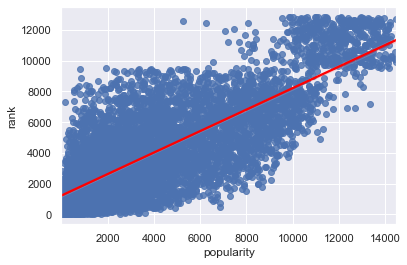

In [21]:
# ratings versus popularity regression plot
sb.set(color_codes=True)
ax = sb.regplot(x="popularity", y="rank", data=anime_df,line_kws={'color':'red'})

,anime_id,episodes,airing,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
anime_id,1.000000,-0.109610,0.223734,-0.223733,-0.046057,0.274671,0.205813,-0.032301,-0.054066,-0.205838,0.623290
episodes,-0.109610,1.000000,-0.037289,0.076875,0.068544,-0.049064,-0.009545,0.079572,0.106804,-0.105711,-0.147920
airing,0.223734,-0.037289,1.000000,-0.066910,-0.046482,0.100467,0.079229,-0.030711,-0.004717,-0.086957,0.142681
score,-0.223733,0.076875,-0.066910,1.000000,0.381926,-0.898747,-0.688492,0.415626,0.256094,0.298989,0.042159
scored_by,-0.046057,0.068544,-0.046482,0.381926,1.000000,-0.356686,-0.425719,0.987107,0.793949,0.046203,0.110892
rank,0.274671,-0.049064,0.100467,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503,-0.294528,-0.063543
popularity,0.205813,-0.009545,0.079229,-0.688492,-0.425719,0.777302,1.000000,-0.474798,-0.210745,-0.159596,-0.236951
members,-0.032301,0.079572,-0.030711,0.415626,0.987107,-0.391524,-0.474798,1.000000,0.781565,0.039457,0.135725
favorites,-0.054066,0.106804,-0.004717,0.256094,0.793949,-0.208503,-0.210745,0.781565,1.000000,0.002669,0.031254
duration_min,-0.205838,-0.105711,-0.086957,0.298989,0.046203,-0.294528,-0.159596,0.039457,0.002669,1.000000,-0.183812


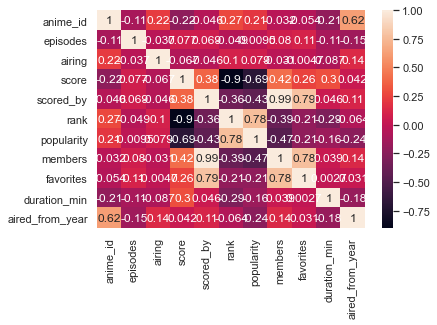

In [26]:
anime_corr = anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.heatmap(anime_corr, annot=True)

# correlation matrix
anime_corr

As we can see in the correlation matrix above, the correlation between rank and popularity is 0.777302, indicating that there is a significant association between the rank of an anime and its popularity. 

### **1.2** Score Distribution of All Data

This is the distribution of scores created by the users according to the dataframe. The average score is **6.848998200359928** for all scores according to the distribution.

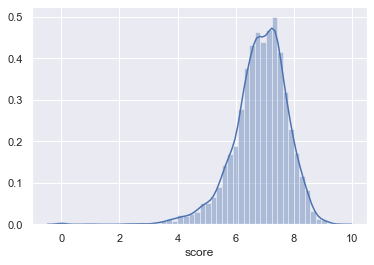

In [33]:
# distribution plot of scores
ax = sb.distplot(anime_df['score'])

In [32]:
# mean of scores
average_score = anime_df['score'].mean()
average_score

6.848998200359928

### **1.3** Scores and Rank by Genre

In [ ]:
# boxplot of mean scores per genre
sb.set(style="whitegrid")
ax = sb.boxplot(x='genre', y='score', data=anime_df)

In [49]:
# mean rank per genre


Comedy, Supernatural, Romance, Shounen
Comedy, Parody, Romance, School, Shounen
Comedy, Magic, School, Shoujo
Comedy, Drama, Magic, Romance, Fantasy
Comedy, Drama, Romance, Shounen
Kids, School, Shoujo
Magic, Comedy, Romance, School, Shoujo
Action, Drama, Fantasy, Romance, School, Supernatural
Music, Slice of Life, Comedy, Romance, Josei
Comedy, Harem, Romance, School, Shoujo
Comedy, Drama, Romance, Shounen Ai
Comedy, Romance, School, Shoujo
Comedy, Drama, Romance, Shounen Ai
Slice of Life, Comedy, Romance, School, Shoujo
Action, Adventure, Comedy, Super Power, Supernatural, Shounen
Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen
Slice of Life, Drama, Romance, School, Shoujo
Action, Adventure, Comedy, Super Power, Martial Arts, Shounen
Slice of Life, Comedy, Martial Arts, Fantasy
Slice of Life, Comedy, Romance, School
Comedy, Drama, Romance, Shounen
Comedy, School, Shoujo, Super Power
Comedy, Drama, Romance, Shoujo
Drama, Game, Josei, School, Slice of Life, Sports
Action, Magic, Fantasy,

Drama, Slice of Life
Music
Hentai
Martial Arts, School, Shounen
Comedy, Romance, School, Shounen, Slice of Life
Hentai
Comedy
Comedy, Drama, Romance, School, Slice of Life, Supernatural
Comedy, Ecchi, Parody
Slice of Life, Fantasy
Comedy, Drama, Ecchi, Romance, School
Action, Adventure, Comedy
Drama, Ecchi, Harem, Historical, Mecha, Supernatural
Comedy, Fantasy, Magic
Action, Military, Sci-Fi, Adventure
Slice of Life, Comedy
Dementia
School, Slice of Life
Hentai, School, Yuri
Comedy, Drama, Romance, Sports
Action, Slice of Life, Adventure, Fantasy, Martial Arts, Comedy, Super Power, Shounen
Comedy, Parody
Action, Fantasy, Comedy, Sci-Fi
Action, Harem, Comedy, Supernatural, Magic, Romance, Ecchi, Fantasy, School, Shounen
Action, Military, Sci-Fi, Adventure, Music, Comedy, Drama, Romance, Mecha, Shounen
Game, Military, Sci-Fi, Adventure, Demons
Action, Adventure, Comedy, Mecha, Sci-Fi, Super Power
Slice of Life, Comedy
Action, Adventure, Demons, Drama, Horror, Super Power
Action, Adventu

Fantasy
Adventure
Comedy, Sci-Fi, Shounen
Slice of Life, Drama, Magic, Romance, Shounen
Action, Game, Shounen
Sci-Fi, Adventure, Comedy, Magic
Harem, Comedy, Demons, Romance, Fantasy, Shounen
Action, Military, Horror, Supernatural, Vampire, Seinen
School, Slice of Life, Supernatural
Hentai
Action, Sports, Shounen
Music, Fantasy
Action, Sci-Fi, Adventure, Comedy, Fantasy, Shounen
Romance, Drama, Seinen
Sci-Fi, Harem, Comedy, Supernatural, Ecchi, Shounen
Hentai
Sci-Fi, Comedy, Police, Mecha
Sci-Fi, Adventure, Space, Drama, Fantasy
Comedy, Mystery, Super Power
Adventure, Comedy, Mystery
Action, Drama, Historical, Horror, Romance, Sci-Fi, Vampire
Harem, School, Shoujo, Vampire
Action, Super Power, Supernatural, Ecchi, Seinen
Drama, Mystery, Sci-Fi, Supernatural, Thriller
Comedy, School, Shounen, Slice of Life
Comedy, Drama
Adventure, Comedy, Kids, Fantasy
Adventure, Romance, Mecha, Military, Sci-Fi, Horror, Space, Drama
Comedy, Ecchi, Fantasy, Parody
Hentai
Action, Game, Shounen
Drama, Mus

Action, Martial Arts, Fantasy
Action, Music, Sci-Fi
Slice of Life, Comedy, School
Action, Adventure, Fantasy, Martial Arts
Adventure, Comedy, Horror, Supernatural, Fantasy
Historical, Drama, Romance, Shoujo
Comedy, Psychological, Drama, Romance
Action, Demons, Fantasy, Horror, Supernatural
Comedy, School, Shoujo
Hentai
Hentai
Action, Supernatural, Magic, Fantasy
Music
Comedy, Kids
Action, Adventure, Romance, Sci-Fi
Comedy, Slice of Life
Comedy, Ecchi, Romance, Shounen, Supernatural
Sci-Fi, Adventure, Comedy
Sci-Fi, Music, Slice of Life
Comedy
Comedy, Kids
Hentai
Sports
Music, Slice of Life, School
Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Adventure, Fantasy
Slice of Life, Shoujo
Adventure, Cars, Sports, Shounen
Action, Game, Kids
Action, Adventure, Martial Arts, Shounen, Super Power, Supernatural
Slice of Life, Supernatural, Drama, Fantasy, Shoujo
Parody
Action, Horror, Supernatural, Drama, Martial Arts, Fantasy, School
Hentai
Action, Adventure, Drama, Psychological,

Action, Military, Sci-Fi, Space, Drama
Action, Sci-Fi, Adventure, Space, Mecha
Adventure, Comedy, Demons, Fantasy, Shoujo
Action, Sci-Fi, Adventure, Sports, Shounen
Kids, Magic
Adventure, Drama, Fantasy, Shoujo
Fantasy
Action, Adventure, Comedy, Mecha, Sci-Fi
Comedy, Kids
Adventure, Comedy, Fantasy, Shounen
Drama, Romance, Sci-Fi
Hentai
Adventure, Fantasy
Action, Martial Arts, Comedy, School, Shounen
Adventure, Comedy, Slice of Life, Super Power
Action, Kids, Mecha
Action, Martial Arts, Historical
Comedy, Magic, Fantasy
Action, Magic
Sci-Fi, Adventure, Romance, Fantasy, Josei
Action, Drama, Shounen, Sports
Comedy, Fantasy, Kids
Adventure, Comedy, Mystery, Police, Shounen, Sports
Action, Fantasy, Magic, Shoujo
Adventure, Comedy, Fantasy, Historical, Shounen
Action, Sci-Fi, Adventure, Comedy, Fantasy, Shounen
Comedy, Romance, Seinen
Game
Action, Adventure, Comedy, Kids
Game, Kids
Sports, Psychological, Seinen
Adventure, Comedy, Fantasy, Magic, Romance, Super Power
Action, Sci-Fi, Adventu

Comedy, Drama, Romance, School
Comedy, Demons, Supernatural
Comedy, Slice of Life
Action, Comedy, Magic, Fantasy
Military, Sci-Fi, Space, Drama, Mecha
Adventure, Drama, Historical, Romance, Shoujo
Action, Sci-Fi, Super Power
Harem, Romance, Supernatural
Action, Mystery, Comedy, Super Power
Comedy, School, Shoujo
Comedy, Harem, Mecha, Romance, School, Sci-Fi
Mystery, Comedy, School, Shoujo
Action, Comedy, Demons, Ecchi, Harem, Romance, Supernatural
Adventure, Police, Comedy, Mystery, Shounen
Action, Comedy, Drama, Police, Shounen
Comedy, Romance
Action, Mecha, Romance, Shounen
Comedy
Game, Shounen
Hentai
Slice of Life, Comedy, Parody, School
Action, Sci-Fi, Adventure, Comedy, Romance
Slice of Life, Comedy
Comedy, Sports, Shounen
Slice of Life, Comedy
Comedy, School, Shounen, Slice of Life
Adventure, Comedy, Sci-Fi, Shounen
Comedy
Slice of Life, Comedy
Comedy, Parody, Super Power
Action, Supernatural, Magic, Romance, Fantasy, Shounen
Action, Comedy, Mystery, Shounen
Action, Adventure, Co

### **1.4** Scores and Rank by Production Studio

In [ ]:
# boxplot of mean scores per studio

In [ ]:
# distribution of number of scores per production studio

### **1.5** Scores and Rank by Airing Year

In [ ]:
# boxplot of mean scores per year

In [ ]:
# distribution of number of scores per airing year

## **2.** Feature Selection/Extraction

**notes:**
* sort by popularity